In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

plt.style.use('fivethirtyeight')

%matplotlib inline

# Reading the data

In [2]:
data = pd.read_csv('winequality-white.csv', sep = ';')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Implementing the Solution

## Adding an extra Column

In [3]:
X = np.append(arr = np.ones((X.shape[0], 1)), values = X, axis = 1)

## Splitting the data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Scaling the data

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
X_train

array([[ 0.        ,  0.0441206 , -0.88666254, ...,  1.64245549,
         0.25377535,  0.22561274],
       [ 0.        ,  0.75229967, -0.98696626, ..., -1.16292343,
        -0.96844399,  0.06397566],
       [ 0.        ,  0.28018029, -0.98696626, ..., -1.75009576,
         0.42837811, -0.90584681],
       ...,
       [ 0.        ,  0.16215045, -0.78635881, ...,  0.01142124,
        -0.27003294,  0.79134251],
       [ 0.        , -0.19193908, -1.68909234, ...,  0.07666261,
        -1.23034814, -0.58257265],
       [ 0.        ,  0.98835935, -0.38514391, ...,  0.46811083,
         0.34107673, -0.09766142]])

In [7]:
X_test

array([[ 0.        ,  1.22441904, -1.08726999, ...,  0.66383494,
         2.3490085 , -0.74420973],
       [ 0.        , -0.90011815,  0.01607099, ...,  0.5333522 ,
         0.9521864 , -0.58257265],
       [ 0.        ,  0.39821013, -0.68605509, ...,  0.40286946,
        -0.79384123,  0.62970543],
       ...,
       [ 0.        , -1.01814799, -0.38514391, ..., -0.96719932,
         1.30139193,  0.9799191 ],
       [ 0.        ,  0.28018029, -0.98696626, ..., -0.90195795,
         0.34107673,  0.62970543],
       [ 0.        ,  0.16215045,  1.82153804, ..., -0.70623384,
         0.60298087, -0.90584681]])

## Linear regression

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

In [9]:
predictions

array([5.75673503, 5.48185655, 6.04799747, ..., 6.33832604, 6.1957071 ,
       5.41636787])

In [10]:
y_test

2089    6
436     5
1247    6
2698    6
827     9
       ..
4664    7
4162    7
4637    6
3360    7
3935    5
Name: quality, Length: 1225, dtype: int64

# Evaluating and improving the model

In [11]:
r2_score(y_test, predictions)

0.24245836138857957

## Backwards elimination

In [12]:
X_opt = X[:, [0, 1, 2, 4, 6, 8, 9, 10, 11]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        13:18:36   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        154.1062     18.100      8.514      0.000     118.622     189.591
x1             0.0681      0.020      3.333      0.001       0.028       0.108
x2            -1.8881      0.110    -17.242      0.000      -2.103      -1.673
x3             0.0828      0.007     11.370      0.000       0.069       0.097
x4             0.0033      0.001      4.950      0.000       0.002       0.005
x5          -154.2913     18.344     -8.411      0.000    -190.254    -118.329
x6             0.6942      0.103      6.717      0.000       0.492       0.897
x7             0.6285      0.100      6.287      0.000       0.433       0.824
x8             0.1932      0.024      8.021      0.000       0.146       0.240
==============================================================================
Omnibus:                      114.194   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.255
Skew:                           0.075   Prob(JB):                     2.76e-55
Kurtosis:                       4.099   Cond. No.                     9.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Displaying the results

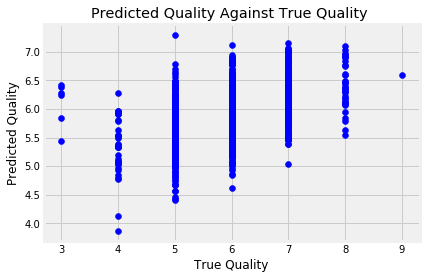

In [13]:
plt.scatter(y_test, predictions, c='b')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality ')

plt.show()